##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler ,LabelEncoder,OneHotEncoder
import seaborn as sns

##Load Data

In [ ]:
datasets = pd.read_csv('./Exercise-CarData.csv',index_col=0)
print(datasets)

      Price   Age     KM FuelType  ... Automatic    CC  Doors  Weight
0     13500  23.0  46986   Diesel  ...         0  2000  three    1165
1     13750  23.0  72937   Diesel  ...         0  2000      3    1165
2     13950  24.0  41711   Diesel  ...         0  2000      3    1165
3     14950  26.0  48000   Diesel  ...         0  2000      3    1165
4     13750  30.0  38500   Diesel  ...         0  2000      3    1170
...     ...   ...    ...      ...  ...       ...   ...    ...     ...
1431   7500   NaN  20544   Petrol  ...         0  1300      3    1025
1432  10845  72.0     ??   Petrol  ...         0  1300      3    1015
1433   8500   NaN  17016   Petrol  ...         0  1300      3    1015
1434   7250  70.0     ??      NaN  ...         0  1300      3    1015
1435   6950  76.0      1   Petrol  ...         0  1600      5    1114

[1436 rows x 10 columns]


##Find the missing values and handle it by Imputation

In [ ]:
df = datasets;

df.dropna(axis=1,how='all',inplace=True)

df['Price'] = pd.to_numeric(df.Price.astype(str).str.replace(',',''), errors='coerce')
df['Price'] = df['Price'].fillna(df['Price'].mean())

df['Age']=df['Age'].fillna(df['Age'].mean())

df['KM'] = pd.to_numeric(df.KM.astype(str).str.replace(',',''), errors='coerce')
df['KM'] = df['KM'].fillna(df['KM'].mean())

#df['FuelType'] = df['FuelType'].fillna('Petrol')

df['HP'] = pd.to_numeric(df.HP.astype(str).str.replace(',',''), errors='coerce').fillna(90).astype(int)

df['MetColor'] = pd.to_numeric(df.MetColor.astype(str).str.replace(',',''), errors='coerce').fillna(1).astype(int)

df['Automatic'] = pd.to_numeric(df.Automatic.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

df['CC'] = pd.to_numeric(df.CC.astype(str).str.replace(',',''), errors='coerce')
df['CC'] = df['CC'].fillna(df['CC'].mean())

df['Doors'] = pd.to_numeric(df.Doors.astype(str).str.replace(',',''), errors='coerce').fillna(4).astype(int)

df['Weight'] = pd.to_numeric(df.Weight.astype(str).str.replace(',',''), errors='coerce')
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())



df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.000000,46986.000000,Diesel,90,1,0,2000,4,1165
1,13750,23.000000,72937.000000,Diesel,90,1,0,2000,3,1165
2,13950,24.000000,41711.000000,Diesel,90,1,0,2000,3,1165
3,14950,26.000000,48000.000000,Diesel,90,0,0,2000,3,1165
4,13750,30.000000,38500.000000,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,55.672156,20544.000000,Petrol,86,1,0,1300,3,1025
1432,10845,72.000000,68647.239972,Petrol,86,0,0,1300,3,1015
1433,8500,55.672156,17016.000000,Petrol,86,0,0,1300,3,1015
1434,7250,70.000000,68647.239972,NaN,86,1,0,1300,3,1015


##Use dummy variables from pandas library to create one column for each FuelType 

In [ ]:

dummy = pd.get_dummies(df['FuelType'])
print("\n\nDummy :\n",dummy)
df = df.drop(['FuelType'],axis=1)
df = pd.concat([dummy,df],axis=1)
print("\n\nFinal Data :\n",df)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]


Final Data :
       CNG  Diesel  Petrol  Price  ...  Automatic    CC  Doors  Weight
0       0       1       0  13500  ...          0  2000      4    1165
1       0       1       0  13750  ...          0  2000      3    1165
2       0       1       0  13950  ...          0  2000      3    1165
3       0       1       0  14950  ...          0  2000      3    1165
4       0       1       0  13750  ...          0  2000      3    1170
...   ...     ...     ...    ...  ...        ...   ...    ...     ...
1431    0       0       1   7500  ...          0  1300      3    1025
1432    0       0       1  10845  ...          0  1300      3    1015
1433  

##Seprate Input and Output attributes

In [ ]:
X = df.loc[:,df.columns != "Price"]

Y = df["Price"].values

X_new = X.iloc[:,1:].values
X = X.values
X_new
# print(X_new)

array([[1.00000000e+00, 0.00000000e+00, 2.30000000e+01, ...,
        2.00000000e+03, 4.00000000e+00, 1.16500000e+03],
       [1.00000000e+00, 0.00000000e+00, 2.30000000e+01, ...,
        2.00000000e+03, 3.00000000e+00, 1.16500000e+03],
       [1.00000000e+00, 0.00000000e+00, 2.40000000e+01, ...,
        2.00000000e+03, 3.00000000e+00, 1.16500000e+03],
       ...,
       [0.00000000e+00, 1.00000000e+00, 5.56721557e+01, ...,
        1.30000000e+03, 3.00000000e+00, 1.01500000e+03],
       [0.00000000e+00, 0.00000000e+00, 7.00000000e+01, ...,
        1.30000000e+03, 3.00000000e+00, 1.01500000e+03],
       [0.00000000e+00, 1.00000000e+00, 7.60000000e+01, ...,
        1.60000000e+03, 5.00000000e+00, 1.11400000e+03]])

##Perform scaling (Min-Max Normalization)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[1.         0.         0.27848101 ... 1.         0.66666667 0.26829268]
 [1.         0.         0.27848101 ... 1.         0.33333333 0.26829268]
 [1.         0.         0.29113924 ... 1.         0.33333333 0.26829268]
 ...
 [0.         1.         0.6920526  ... 0.         0.33333333 0.02439024]
 [0.         0.         0.87341772 ... 0.         0.33333333 0.02439024]
 [0.         1.         0.94936709 ... 0.42857143 1.         0.18536585]]


##Perform Standardization

In [ ]:
std = StandardScaler()
X_std = std.fit_transform(X_new)
print(X_std)

[[ 2.99536679 -2.1317602  -1.82280225 ...  2.31497633 -0.0351258
   1.75856113]
 [ 2.99536679 -2.1317602  -1.82280225 ...  2.31497633 -1.08597279
   1.75856113]
 [ 2.99536679 -2.1317602  -1.76701156 ...  2.31497633 -1.08597279
   1.75856113]
 ...
 [-0.33384893  0.46909591  0.         ... -1.42599356 -1.08597279
  -1.09191497]
 [-0.33384893 -2.1317602   0.79936038 ... -1.42599356 -1.08597279
  -1.09191497]
 [-0.33384893  0.46909591  1.13410455 ...  0.17727925  1.01572118
   0.78939926]]


##Selecting features based on correlation

###Generating the correlation matrix

In [ ]:
corr = df.corr()
corr.head()

,CNG,Diesel,Petrol,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
CNG,1.000000,-0.034300,-0.219022,-0.032498,0.006722,0.145203,0.059689,0.005523,-0.024955,0.018141,0.017984,0.051688
Diesel,-0.034300,1.000000,-0.711686,0.014590,-0.068693,0.404627,-0.524003,-0.010634,-0.081090,0.730292,0.012636,0.516471
Petrol,-0.219022,-0.711686,1.000000,-0.024046,0.062043,-0.323775,0.407704,-0.013522,0.058664,-0.561913,-0.010168,-0.425511
Price,-0.032498,0.014590,-0.024046,1.000000,-0.845111,-0.565016,0.305805,0.100920,0.033081,0.165067,0.185579,0.581198
Age,0.006722,-0.068693,0.062043,-0.845111,1.000000,0.495199,-0.151301,-0.084719,0.030931,-0.116255,-0.152555,-0.442055


###Generating the correlation heatmap

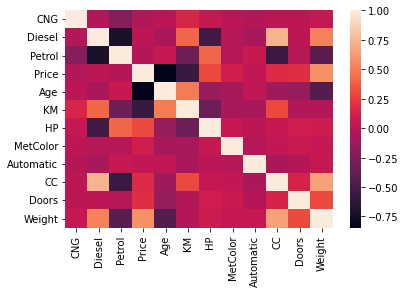

In [ ]:
sns.heatmap(corr)

###Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [ ]:
selected_columns = df.columns[columns]
selected_columns.shape

(12,)

In [ ]:
df = df[selected_columns]
df

,CNG,Diesel,Petrol,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,0,1,0,13500,23.000000,46986.000000,90,1,0,2000,4,1165
1,0,1,0,13750,23.000000,72937.000000,90,1,0,2000,3,1165
2,0,1,0,13950,24.000000,41711.000000,90,1,0,2000,3,1165
3,0,1,0,14950,26.000000,48000.000000,90,0,0,2000,3,1165
4,0,1,0,13750,30.000000,38500.000000,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0,0,1,7500,55.672156,20544.000000,86,1,0,1300,3,1025
1432,0,0,1,10845,72.000000,68647.239972,86,0,0,1300,3,1015
1433,0,0,1,8500,55.672156,17016.000000,86,0,0,1300,3,1015
1434,0,0,0,7250,70.000000,68647.239972,86,1,0,1300,3,1015
